In [7]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import evaluation as eval
import simulation as sim
import reconstruction as reco
import offset_analysis as a

In [20]:
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/62dot5_yz_10_5/"
n_runs = 7
n_offsets = 10

In [9]:
y[0]

array([   0.        ,   14.91202932,  -56.54248379,   36.92188136,
         13.19371022,   49.93132645,    0.        ,   75.50643366,
         34.27260083,  -17.60332987,  -42.41001621,   36.89417127,
          0.        ,   44.78375822,  -41.61283036,   14.23444207,
         87.79930278,  -47.86069977,    0.        ,  -23.51920303,
       -130.39409232,   41.44510124,  -56.69293119,   12.00068211,
          0.        , -115.14203043,   58.27860201,  129.37727947,
       -107.91168763,   45.93512063,    0.        ,   87.07090314,
        -10.77017132,   42.17125341,  -82.34246085,   91.18201924,
          0.        , -122.52307774, -125.23782013,   66.30363112,
         34.59368837,  -35.74204179,    0.        ,  132.03127474,
         73.01143765,  151.72631138, -142.04781995,  102.05804376,
          0.        ,  -27.81335571, -101.74928845,   43.84770652,
         78.45878323,   98.47667179,    0.        ,   60.17699665,
         -3.87721744,   23.21788008, -102.84061796,   18.96104

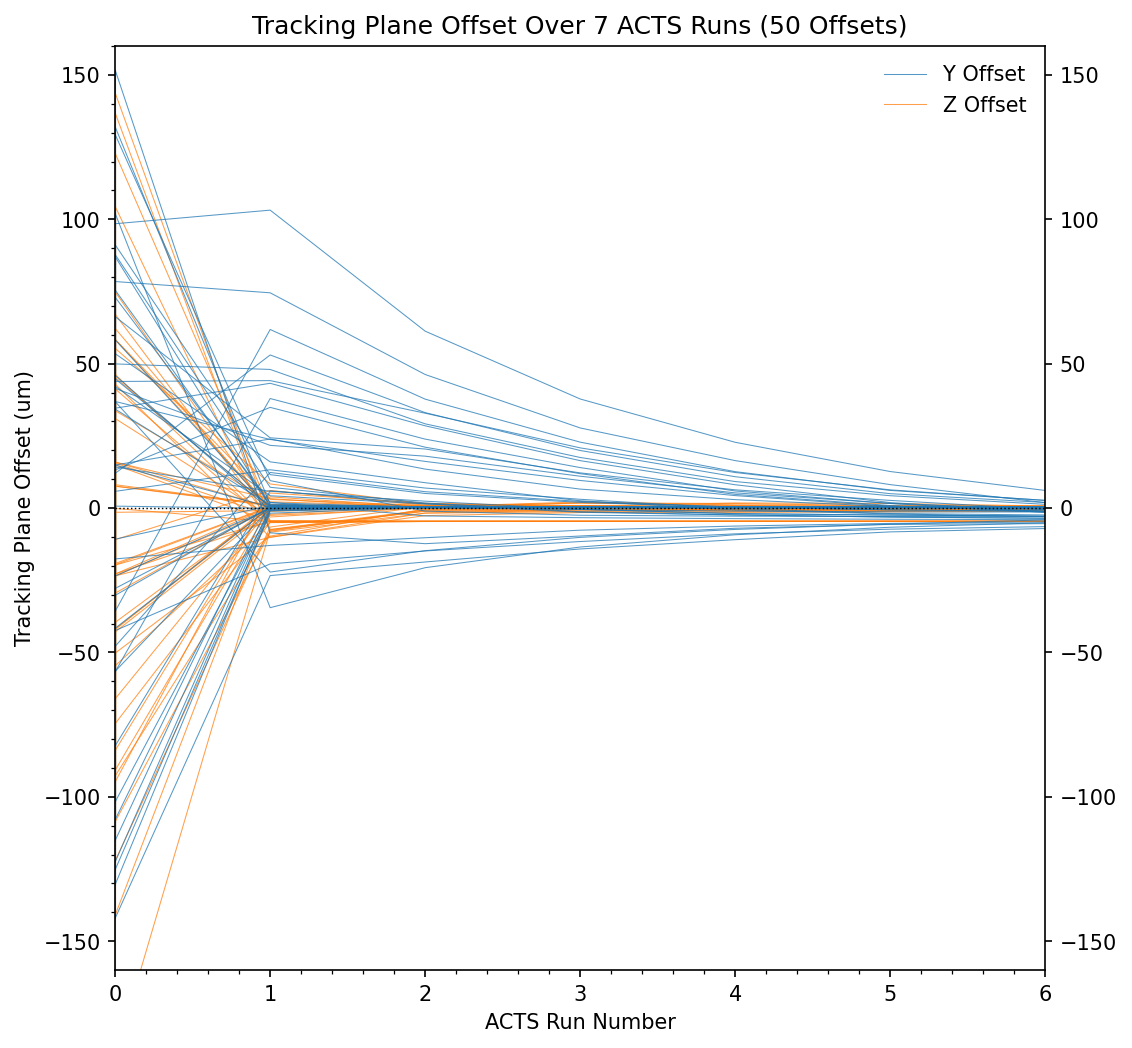

In [21]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*5))
for i in range(n_runs):
    x[i] += i

y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
for i in range(1, n_runs):
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))
plt.yticks([-150, -100, -50, 0, 50, 100, 150])
plt.minorticks_on()
plt.ylim(-160, 160)
plt.xlim(0, n_runs-1)


plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Offset (um)")
plt.title("Tracking Plane Offset Over 7 ACTS Runs (50 Offsets)")
plt.tick_params(right = True, labelright = True)

plt.plot(x[0], y[0], lw = 0.5, alpha = 0.75, color="tab:blue", label = "Y Offset")
plt.plot(x[0], z[0], lw = 0.5, alpha = 0.75, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Offset", "Z Offset"], frameon=False)

plt.plot(x, z, lw = 0.5, alpha = 0.75, color="tab:orange")
plt.plot(x, y, lw = 0.5, alpha = 0.75, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)

plt.show()

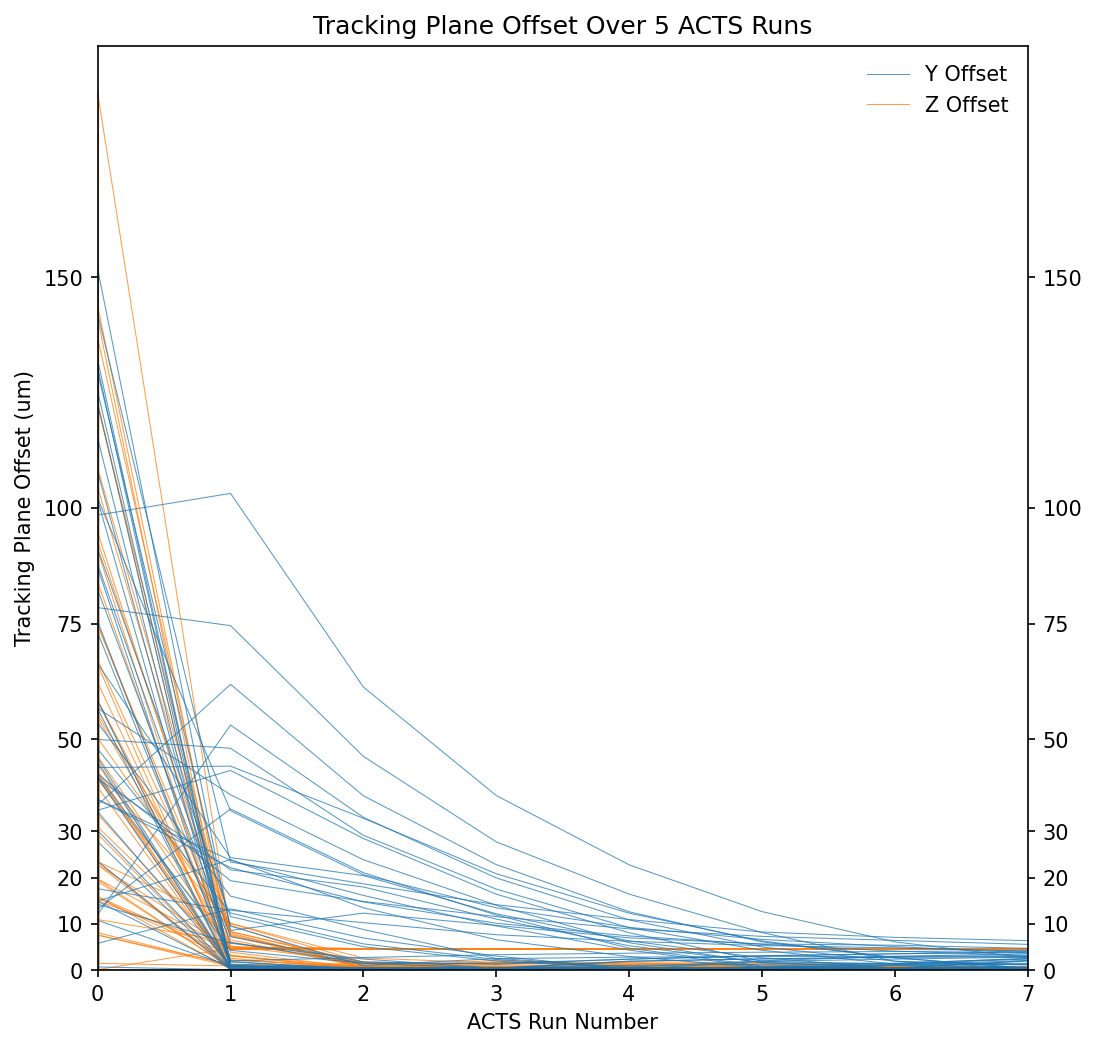

In [244]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.zeros((n_runs, n_offsets*5))
for i in range(n_runs):
    x[i] += i

y = [np.loadtxt(input_dir + str(0) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
z = [np.loadtxt(input_dir + str(0) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]
for i in range(1, n_runs):
    y = np.concatenate((y, [np.loadtxt(input_dir + str(i) + "/offsets_y.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)
    z = np.concatenate((z, [np.loadtxt(input_dir + str(i) + "/offsets_z.csv", delimiter = ",")[0:n_offsets][:,1:6].flatten()*1000]), axis = 0)

plt.xticks(np.arange(0,n_runs))

plt.yticks([0, 10, 20, 30, 50, 75, 100, 150])

plt.ylim(0, 200)
plt.xlim(0, n_runs-1)


plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Offset (um)")
plt.title("Tracking Plane Offset Over 5 ACTS Runs")
plt.tick_params(right = True, labelright = True)

plt.plot(x[0], np.abs(y[0]), lw = 0.5, alpha = 0.75, color="tab:blue", label = "Y Offset")
plt.plot(x[0], np.abs(z[0]), lw = 0.5, alpha = 0.75, color="tab:orange", label = "Z Offset")

plt.legend(labels = ["Y Offset", "Z Offset"], frameon=False)

plt.plot(x, np.abs(z), lw = 0.5, alpha = 0.75, color="tab:orange")
plt.plot(x, np.abs(y), lw = 0.5, alpha = 0.75, color="tab:blue")

plt.hlines(y = 0, xmin = 0, xmax = n_runs-1, linestyles = "dotted", colors = "black", lw = 0.7)

plt.show()

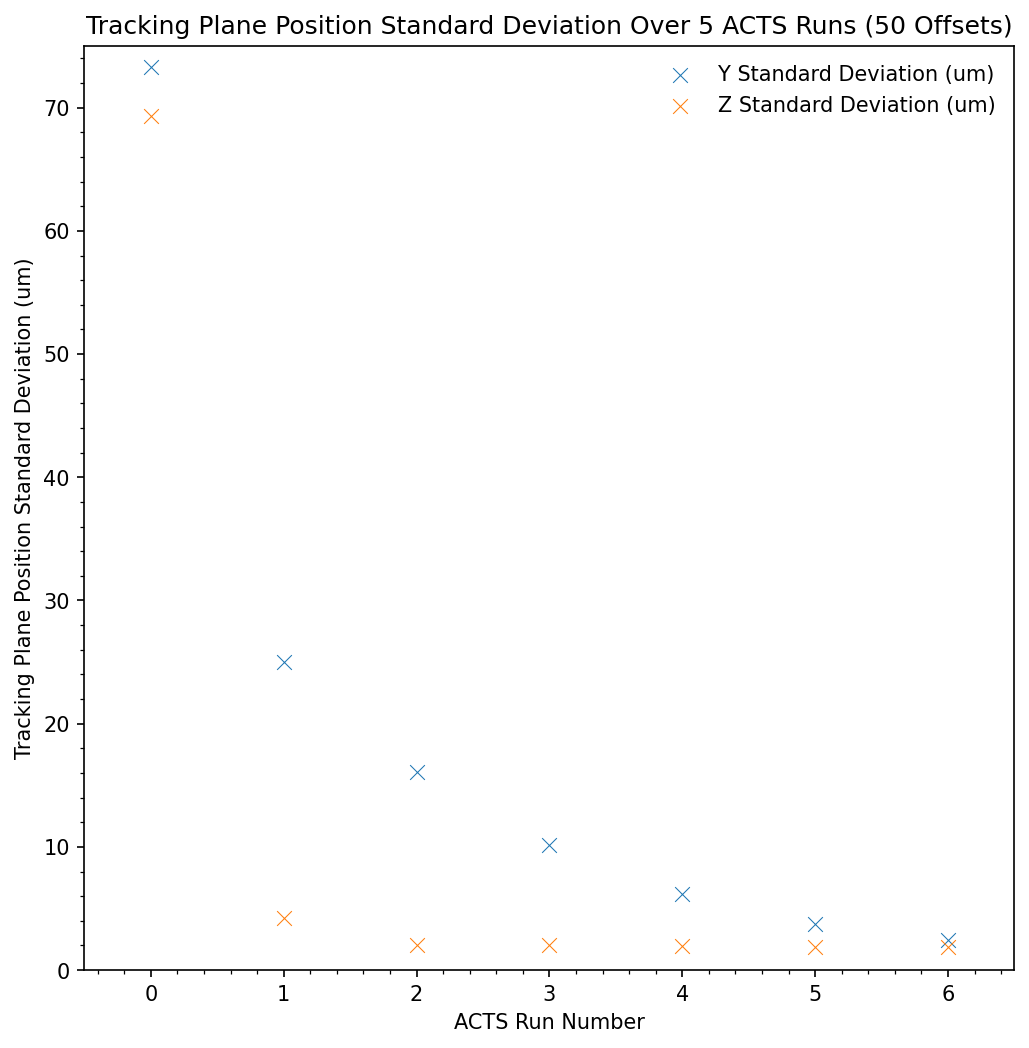

In [22]:
plt.figure(figsize = (8,8), dpi = 150)

x = np.arange(0, n_runs)

std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

plt.ylim(0, 75)
plt.xlim(-0.5, n_runs-0.5)
plt.xticks(np.arange(0,n_runs))
plt.minorticks_on()

plt.xlabel("ACTS Run Number")
plt.ylabel("Tracking Plane Position Standard Deviation (um)")
plt.title("Tracking Plane Position Standard Deviation Over 5 ACTS Runs (50 Offsets)")

plt.scatter(x, std_y, lw = 0.5, color="tab:blue", s = 50, marker = "x")
plt.scatter(x, std_z, lw = 0.5, color="tab:orange", s = 50, marker = "x")

plt.legend(labels = ["Y Standard Deviation (um)", "Z Standard Deviation (um)"], frameon=False)
plt.show()

In [23]:
mean_y = np.mean(y, axis = 1)
mean_z = np.mean(z, axis = 1)

print(mean_y)
print(mean_z)

[ 9.0633238  11.29150121  6.53503183  3.36180443  1.24402775 -0.08689722
 -0.90272672]
[-6.3729004  -1.91190707 -0.85197479 -0.81016862 -0.90988565 -0.94507437
 -0.99777389]


In [24]:
std_y = np.std(y, axis = 1)
std_z = np.std(z, axis = 1)

print(std_y)
print(std_z)

[73.32860065 25.0026537  16.05959391 10.1278007   6.18788051  3.70715513
  2.44972653]
[69.34328755  4.21573597  2.02590462  2.00222238  1.93032481  1.88409636
  1.83852383]
